# 3 - Basic Analysis in Pandas DataFrames

At this point, we've only be working with auto-generated data. Analyzing auto-generate data is a lot like running on a treadmill; no matter how hard to you try you'll always be stuck in the same place(s).

I use auto-generated data to show you some of the fundamentals of Pandas. In the next one, we'll go into real data from NBA.com. In this one, we'll cover how to do some basic analysis on your data by using a few built-in methods that Pandas offers.

Let's start by importing our sample data from `2 - Cleaning Data with Python & Pandas`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

# utils.py was created by us
import utils

In [2]:
# read sample data
df = pd.read_csv("samples/2.csv") 

> Are you missing the sample data? Be sure to [launched this code on Deepnote](https://deepnote.com/launch?url=https://github.com/codingforentrepreneurs/Try-Pandas)

### Analyze Data
Let's take a basic look at how we can analyze this data.

In [3]:
df2 = df.copy()[['name', 'salary_as_float']]

The above command does 2 things: copies the dataframe `df` and selects only some of the columns (in this case `name` and `salary_as_float`. Creating a copy means we won't accidentally modify a previous dataframe. 


In [4]:
df2.head()

,name,salary_as_float
0,Player-0,23564932.0
1,Player-1,19122655.0
2,Player-2,9926467.0
3,Player-3,44055782.0
4,Player-4,41113231.0


In [5]:
df2.shape

(30252, 2)

Using `.shape` will give us the size of our table in the layout (`row_length`, `column_length`).  This `.shape` call matches closely with `numpy`. Something we'll have to revisit another time.

In [6]:
n_rows = df2.shape[0]
n_columns = df2.shape[1]

Let's do some statistics:

In [7]:
avg_salary = df2['salary_as_float'].mean()
most_common_salary = df2['salary_as_float'].mode() # returns a series
top_salary = df2['salary_as_float'].max()
bottom_salary = df2['salary_as_float'].min()

print("Average Salary\t\t\t", utils.float_to_dollars(avg_salary))

print("Top Salary\t\t\t", utils.float_to_dollars(top_salary))

print("Bottom Salary\t\t\t", utils.float_to_dollars(bottom_salary))

print("Top 3 Most Common Salaries\t", ", ".join(most_common_salary.apply(utils.float_to_dollars).values[:3]))

Average Salary			 $25,066,360.11
Top Salary			 $49,994,688.00
Bottom Salary			 $30,352.00
Top 3 Most Common Salaries	 $2,073,450.00, $3,729,147.00, $4,387,250.00


In [8]:
df3 = df2.copy()
df3['salary_normalized'] = (df3['salary_as_float'] - df3['salary_as_float'].min()) / (df3['salary_as_float'].max() - df3['salary_as_float'].min())

Normalizing data is incredibly common. It convers a set of data (in this case `df['salary_as_float']`) and convers all numbers to be within the range of `0` and `1`. Data normalization is a common pre-processing practice when performing machine learning. We're going to use this normalized data as a way to parse our groups based on percentage values. 

In [9]:
def group_salary(val):
    # in the future, this will be stored in
    # utils.py in the courses/ directory
    if val > .95:
        return 'top'
    elif val < .95 and val > .50:
        return 'mid'
    return 'low'

df3['salary_group'] = df3['salary_normalized'].apply(group_salary)

In [10]:
df3['salary_group'].value_counts()

low    15121
mid    13646
top     1485
Name: salary_group, dtype: int64

<AxesSubplot:title={'center':'People in Group'}, xlabel='salary_group,salary_group'>

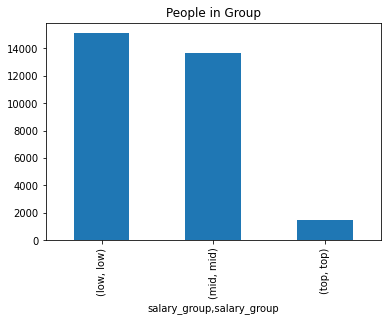

In [11]:
df3.groupby('salary_group')['salary_group'].value_counts().plot(kind='bar', title='People in Group')

As you can see from the chart, the distribution of data falls into 3 categories based on arbitrary splitting done in the `group_salary` method above. 

<AxesSubplot:title={'center':'Average Salary per Group (Normalized)'}, xlabel='salary_group'>

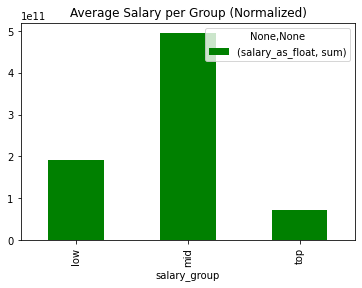

In [12]:
sal_group = df3[['salary_as_float','salary_group']].groupby('salary_group').agg([np.sum])
sal_group.plot(kind = "bar", legend = True, title='Average Salary per Group (Normalized)', color='green')

This chart shows the sum total salary of each group. With Random data, this is not that interesting because there's nothing to be learned from it. With our NBA dataset, it's this chart may look vastly different.